# 2.1 SOO for 2D scalar field

In [31]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

c:\Users\Domfx\OneDrive\Code\cyclops\src


Description

In [32]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'temp_plane_field.obj')
grid = pickle_manager.read_file('simulation', 'temp_plane_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1, 1], [-1, -1]])*0.002

description

In [33]:
# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_2D_x(np.mean(field_bounds[:, 0]))

# Setup the sensor suite
def f(x): return np.zeros(x.shape)
sensor = PointSensor(0, f, 0, np.array([[-5000], [5000]]), 2)
sensors = np.array([sensor]*5)
sensor_suite = SensorSuite(
    ScalarField(RBFModel, field_bounds), 
    sensors,
    symmetry=[symmetry_manager.reflect_2D_horiz]
)

description

In [34]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_temps, model_temps, sensor_values = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  5.116357E+05 |  1.779895E+05
     2 |       60 |  0.00660 |       3 |  0.4041 |  2.00000 |  2.02102 |  3.477678E+05 |  1.779895E+05
     3 |       90 |  0.02215 |       3 |  0.4139 |  1.98974 |  2.03437 |  2.503431E+05 |  1.411433E+05
     4 |      120 |  0.02743 |       3 |  0.4172 |  1.97826 |  2.04804 |  2.019446E+05 |  1.356879E+05
     5 |      150 | -2.0E-02 |       3 |  0.3877 |  1.96596 |  2.05855 |  1.848268E+05 |  1.356406E+05
     6 |      180 | -1.5E-02 |       3 |  0.3907 |  1.95482 |  2.06963 |  1.633972E+05 |  1.356406E+05
     7 |      210 | -1.1E-02 |       3 |  0.3933 |  1.94430 |  2.08585 |  1.503231E+05 |  1.353791E+05
     8 |      240 | -2.0E-04 |       3 |  0.3999 |  1.93069 |  2.09020 |  1.431031E+05 |  1.351133E+05
     9 |      270 | -9.1E-03 |       3 |  0.3944 |  1.92184 |  2.09832 | 

decription

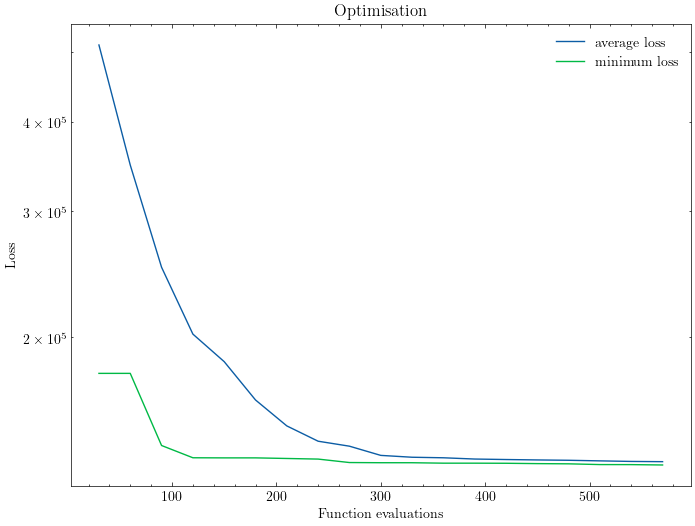

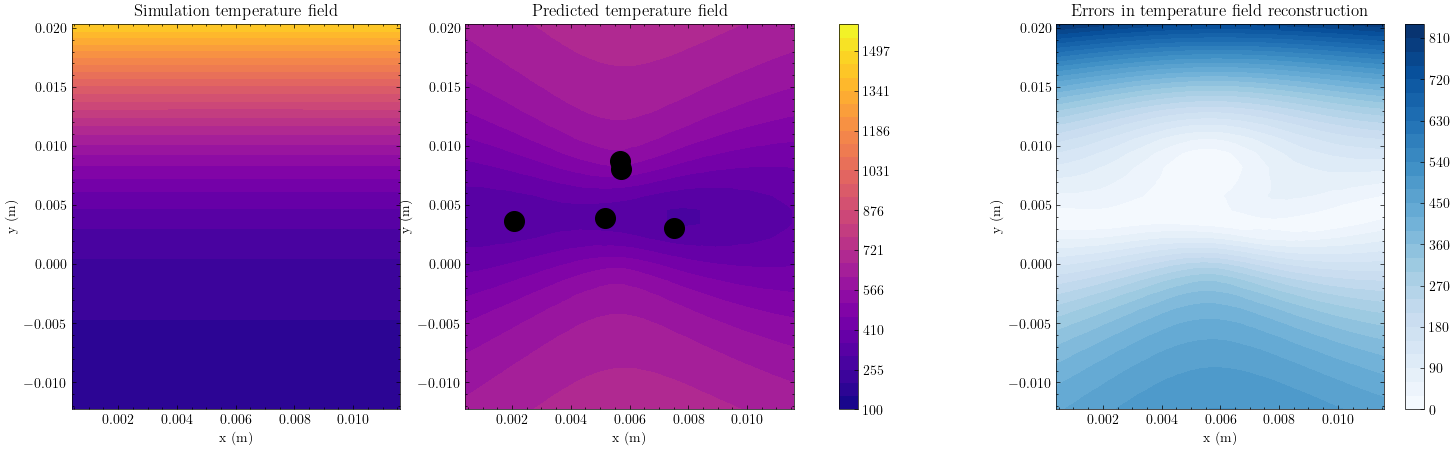

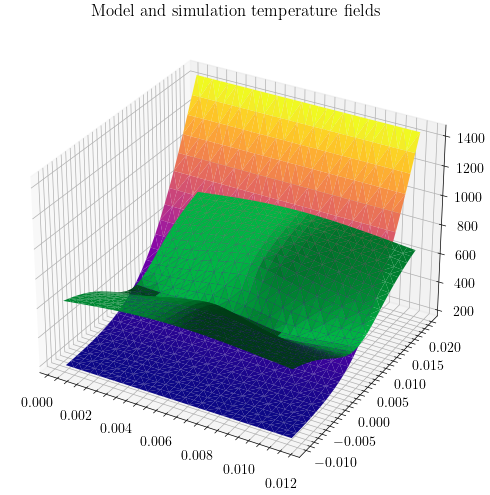

In [35]:
# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_2D_compare(
    grid,
    proposed_layout,
    true_temps,
    model_temps
)
graph_manager.draw()
graph_manager.build_3D_compare(
    grid,
    true_temps,
    model_temps
)
graph_manager.draw()